In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Latex
from sklearn.metrics import r2_score

correlation: 0.07690002530168093
Goodness r^2 of model: 0.0059136138913993275


,Player Sort table by Player in descending order,Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order,Minutes without Steve Nash Sort table by Minutes without Steve Nash in descending order,Stat Value with Steve Nash Sort table by Stat Value with Steve Nash in descending order,Stat Value without Steve Nash Sort table by Stat Value without Steve Nash in descending order,Difference Sort table by Difference in descending order
1,Jim Jackson,609.0,811,0.543,0.477,0.07
2,Walter McCarty,138.0,216,0.562,0.510,0.05
3,Shawn Marion,4854.0,1553,0.572,0.572,0.00
4,Quentin Richardson,2031.0,814,0.534,0.493,0.04
5,Jake Voskuhl,142.0,221,0.552,0.500,0.05
6,Joe Johnson,2185.0,1053,0.592,0.492,0.10
7,Steven Hunter,493.0,558,0.620,0.553,0.07
9,Amar'e Stoudemire,2116.0,819,0.628,0.576,0.05
10,Casey Jacobsen,280.0,487,0.492,0.610,-0.12
13,Leandro Barbosa,921.0,1756,0.624,0.562,0.06


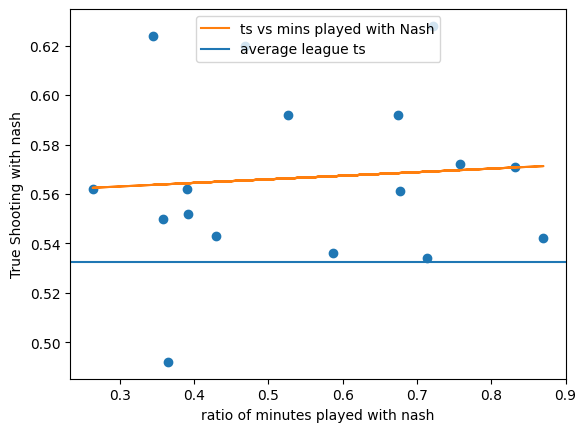

In [14]:
data =pd.read_csv("Nash_TS.csv")
data["Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order"] = data[data[["Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order"]] > 100]["Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order"]
data = data.dropna()
min1 = data["Minutes with Steve Nash Sort table by Minutes with Steve Nash in descending order"]
min2 = data["Minutes without Steve Nash Sort table by Minutes without Steve Nash in descending order"]
mins_ = pd.Series(zip(min1, min2))
min_w = []
for m in mins_:
    min_w.append(m[0]/(m[0]+m[1]))

min_o = []
for m in mins_:
    min_o.append(m[0]/(m[0]+m[1]))

nash_pm = data["Stat Value with Steve Nash Sort table by Stat Value with Steve Nash in descending order"]
plt.plot(min_w, nash_pm, 'o')
plt.xlabel("ratio of minutes played with nash")
plt.ylabel("True Shooting with nash")
slope, intercept, r, p, std_err = stats.linregress(min_w, nash_pm)

def f(x):
  return slope * x + intercept

mymodel = list(map(f, min_w))

coefficient_of_dermination = r2_score(nash_pm, mymodel)

plt.plot(min_w, mymodel, label="ts vs mins played with Nash")
plt.axhline((0.536+0.529)/2, label="average league ts")
plt.legend(loc='upper center')
print("correlation:", r)
print("Goodness r^2 of model:", coefficient_of_dermination)
data

correlation: 0.017392492400989282
Goodness r^2 of model: 0.00030249879191845963


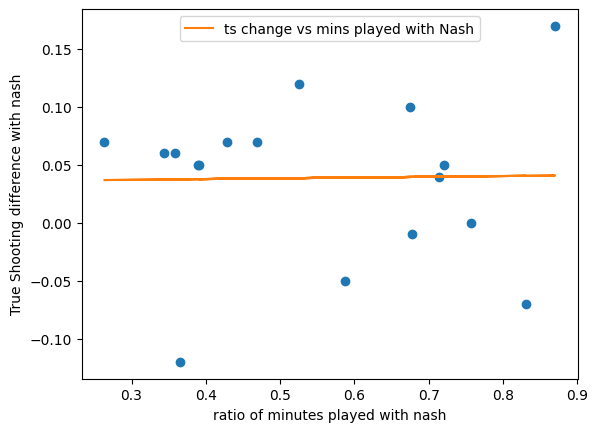

In [5]:
nash_dif = data["Difference Sort table by Difference in descending order"]
plt.plot(min_w, nash_dif, 'o')
plt.xlabel("ratio of minutes played with nash")
plt.ylabel("True Shooting difference with nash")
slope, intercept, r, p, std_err = stats.linregress(min_w, nash_dif)

def f(x):
  return slope * x + intercept

mymodel = list(map(f, min_w))

coefficient_of_dermination = r2_score(nash_dif, mymodel)

plt.plot(min_w, mymodel, label="ts change vs mins played with Nash")
plt.legend(loc='upper center')
print("correlation:", r)
print("Goodness r^2 of model:", coefficient_of_dermination)

correlation: 0.07690002530168093
Goodness r^2 of model: 0.0059136138913993275


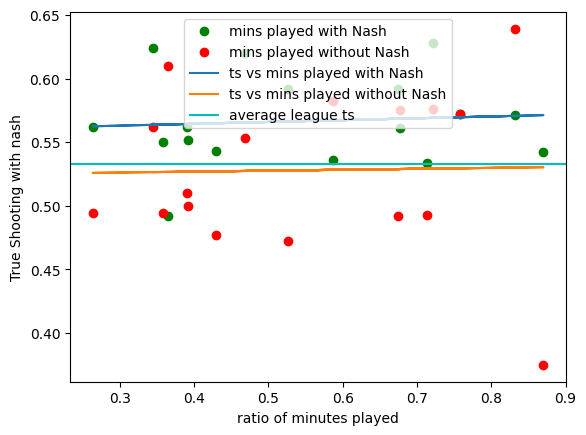

In [23]:
nash_pm = data["Stat Value with Steve Nash Sort table by Stat Value with Steve Nash in descending order"]

plt.plot(min_w, nash_pm, 'o', c='g', label="mins played with Nash")
plt.plot(min_w, nash_o, 'o', c='r', label="mins played without Nash")
plt.xlabel("ratio of minutes played")
plt.ylabel("True Shooting with nash")
slope, intercept, r, p, std_err = stats.linregress(min_w, nash_pm)

def f(x):
  return slope * x + intercept

nash_o = data["Stat Value without Steve Nash Sort table by Stat Value without Steve Nash in descending order"]

slope1, intercept1, r1, p1, std_err1 = stats.linregress(min_o, nash_o)

def f1(x):
  return slope1 * x + intercept1

mymodel = list(map(f, min_w))

mymodel1 = list(map(f1, min_w))

coefficient_of_dermination = r2_score(nash_pm, mymodel)

plt.plot(min_w, mymodel, label="ts vs mins played with Nash")
plt.plot(min_o, mymodel1, label="ts vs mins played without Nash")

plt.axhline((0.536+0.529)/2, label="average league ts", c='c')
plt.legend(loc='upper center')
print("correlation:", r)
print("Goodness r^2 of model:", coefficient_of_dermination)
